In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams.update({'font.size': 22})
colors = ['pink', 'yellow', 'lightblue', 'lightgreen']

df = pd.read_csv("../experiments/balanced-training.csv")

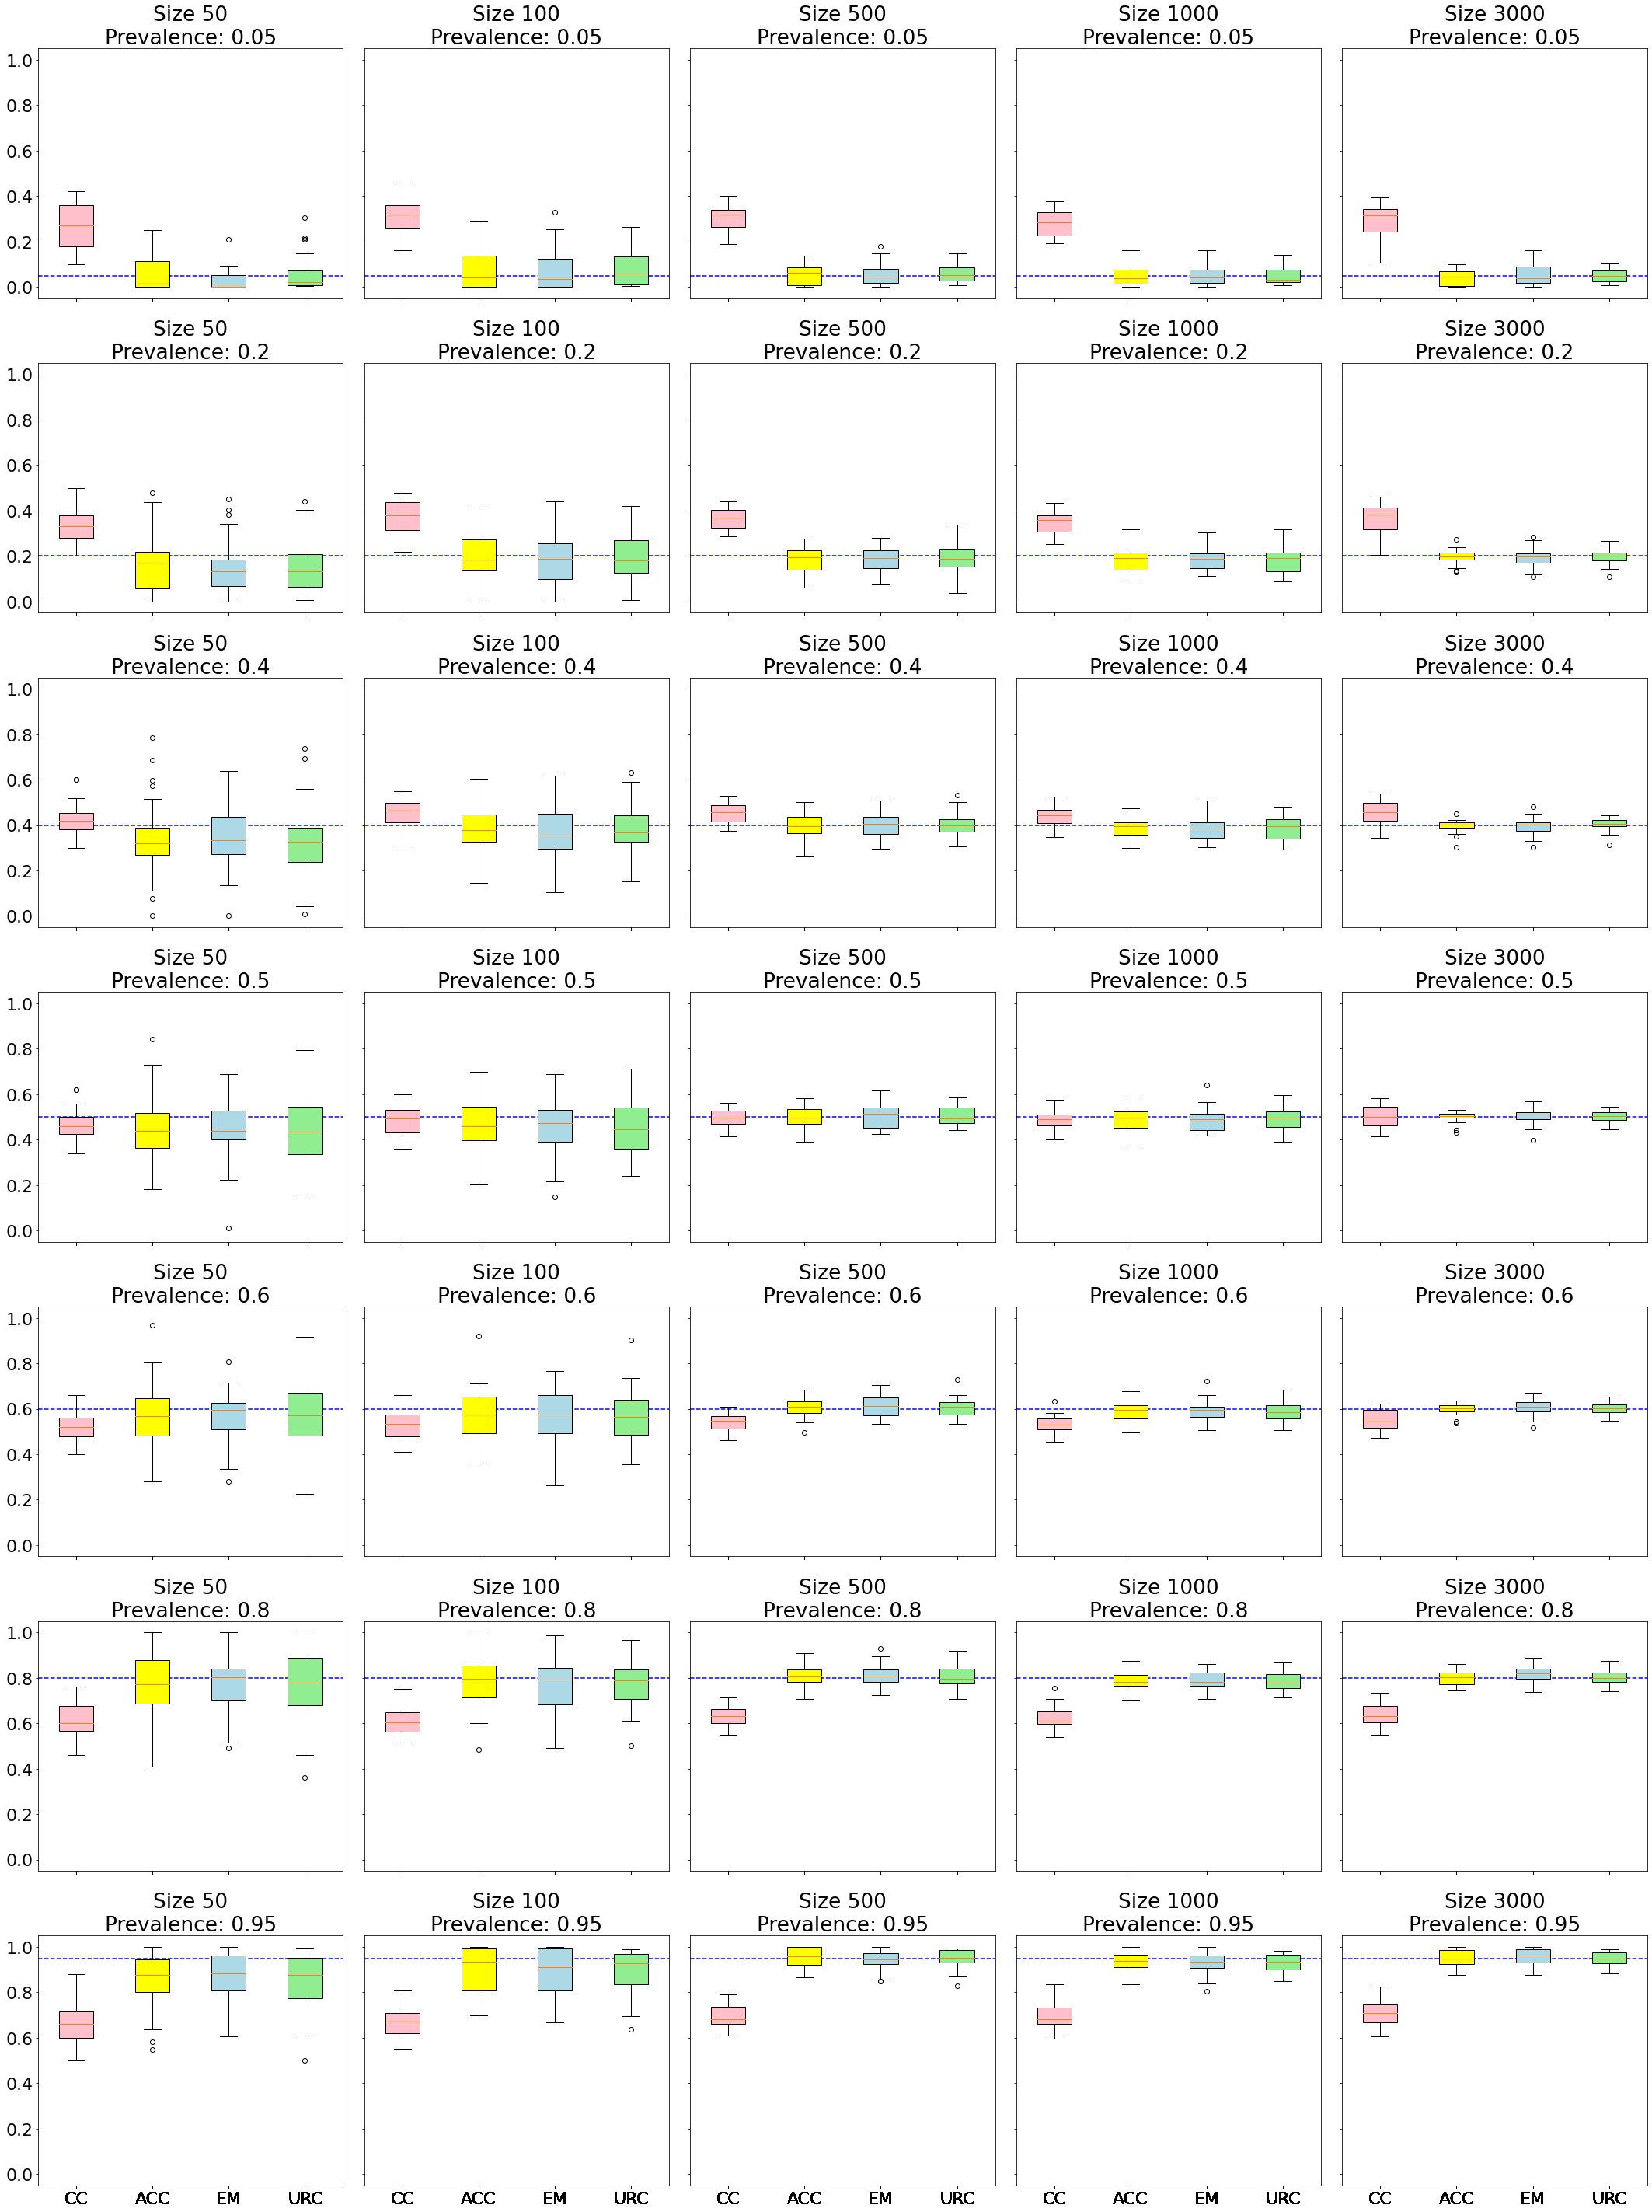

In [6]:
n_prevalence = len(df["test_prevalence"].unique())
n_size = len(df["test_dataset_size"].unique())

fig, axs = plt.subplots(n_prevalence, n_size, sharex=True, sharey=True, figsize=(30, 40))

for i, (true_prev, semigroup) in enumerate(df.groupby(["test_prevalence"])):
    for j, (size, group) in enumerate(semigroup.groupby(["test_dataset_size"])):
        ax = axs[i][j]
    
        labels = ["CC", "ACC", "EM", "URC"]
    
        to_plot = [group[l].values for l in labels]
    
        ax.hlines(true_prev, 0.5, 4.5, colors='b', linestyles='dashed')
        bplot = ax.boxplot(to_plot, labels=labels, notch=False, patch_artist=True)
        ax.set_title(f"Size {size}\nPrevalence: {true_prev}")

        for patch, color in zip(bplot['boxes'], colors):
            patch.set_facecolor(color)

plt.tight_layout()
plt.savefig("balanced-training-grid.pdf", bbox_inches='tight')